In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import matplotlib.patches as mpatches

from src import paths,plotting

plt.style.use('ggplot')

!date -I

2024-05-20


# Compare responses from F-Tract and TMS-EEG

Load results from [01_f-tract/02_analysis_per_roi.ipynb](../01_f-tract/02_analysis_per_roi.ipynb) and [02_pytepfit/05_analysis.ipynb](../02_pytepfit/05_analysis.ipynb) and compare the resposnse characteristics: probability in F-Tract and AUC and first peak latency in TMS-EEG. Our goal is application of the approach by [Seguin et al.](https://doi.org/10.1016/j.neuron.2023.01.027) used in F-Tract to TMS-EEG and investigation if the TMS-EEG response also correlates with the communication metrics calculated on structural connectome. We see in [01_correlations.ipynb](./01_correlations.ipynb) that the correlations with communication metrics are lower for TMS-EEG responses no matter what response chacteristic we use. Now, we want to see in the relationship of response strength defined as AUC of first peak latency and response probability from F-Tract.

We consider only 200 ms response length here.

### Settings

- `FTRACT_SELECTED_ROI` According to [XX_centroids_and_parcellations/DICE_02_glasser-schaefer200_maxdice.ipynb)](../XX_centroids_and_parcellations/DICE_02_glasser-schaefer200_maxdice.ipynb), the right Glasser ROI corresponding to `7Networks_LH_SomMot_9` Schaefer ROI where the TMS stimulation was performed (see [02_pytepfit/02_stimulation-site-extraction.ipynb](../02_pytepfit/02_stimulation-site-extraction.ipynb)) is ROI `1` in left hemisphere. However, there are much more measurements in ROI `3b` in left hemisphere in F-Tract and these ROIs are really close to each other, `7Networks_LH_SomMot_9` has high Dice score with `3b` as well. Because of that, we tried both options.
- `AUC_FP` "AUC" for response characterized with AUC in TMS-EEG, "FP" for response characterized by first peak latency

In [2]:
FTRACT_SELECTED_ROI = "3b" # "1"
AUC_FP = "FP"

In [3]:
fig_dir = f"pytepfit_ftract_responses_comparison/{AUC_FP}/"
%mkdir -p  {paths.path_figures(fig_dir)}

Load F-Tract response probability:

In [4]:
ftract_probabilities = pd.read_csv(paths.path(f'interim/L_{FTRACT_SELECTED_ROI}_response_probability_and_communication_metrics_M1_FTRACT_ED0_long.csv')).set_index('label')
ftract_probabilities

,response,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF
label,,,,,,,,,,,
L_V1,NaN,86.130607,0.0,inf,0.009180,0.004199,0.000142,inf,18.968501,0.005998,0.002778
L_V6,NaN,66.905377,0.0,inf,0.009451,0.005002,0.000193,inf,14.131162,0.008234,0.001962
L_V2,NaN,81.759962,0.0,inf,0.009236,0.004157,0.000104,inf,18.859902,0.006358,0.002463
L_V3,NaN,81.100872,0.0,inf,0.008173,0.004355,0.000131,inf,14.547486,0.007004,0.002766
L_V4,NaN,82.487126,0.0,inf,0.008430,0.004579,0.000099,inf,21.530236,0.007316,0.002854
...,...,...,...,...,...,...,...,...,...,...,...
R_FOP2,NaN,90.352537,0.0,inf,0.007381,0.005861,0.000228,inf,22.657491,0.006939,0.001658
R_PoI1,NaN,95.853057,0.0,inf,0.007615,0.004942,0.000635,inf,15.317664,0.006197,0.002664
R_Ig,NaN,83.897695,0.0,inf,0.007489,0.005057,0.000240,inf,21.995380,0.006711,0.001151


Load TMS-EEG response characteristic based on `AUC_FP` parameter:

In [5]:
pytepfit_response = pd.read_csv(paths.path(f'interim/pyTepFit_empirical/not_over_threshold_nan/response_{AUC_FP}_and_communication_metrics_M1_pyTepFit_200ms_thr8.csv')).set_index('label')
pytepfit_response.index = pytepfit_response.index.map(lambda x: x[:-3])
pytepfit_response

,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF,response
label,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,45.307805,0.001481,56.91748,0.017569,0.009146,0.005899,8.492163,8.492163,0.017569,0.004902,NaN
7Networks_LH_Cont_Cing_2,56.289608,0.000000,inf,0.012035,0.007808,0.001445,inf,13.765920,0.008938,0.003926,30.0
7Networks_LH_Cont_PFCl_1,92.766248,0.000000,inf,0.008308,0.006559,0.000284,inf,13.524316,0.006877,0.002492,114.0
7Networks_LH_Cont_PFCl_2,94.172221,0.000000,inf,0.008227,0.007810,0.001046,inf,15.620317,0.008135,0.004036,109.0
7Networks_LH_Cont_PFCl_3,92.564602,0.000000,inf,0.008065,0.007312,0.000696,inf,12.555779,0.008065,0.003484,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7Networks_RH_Vis_5,115.547602,0.000000,inf,0.006240,0.004349,0.000006,inf,24.493235,0.004887,0.003644,NaN
7Networks_RH_Vis_6,105.548873,0.000000,inf,0.006381,0.004389,0.000011,inf,22.163802,0.003238,0.003574,NaN
7Networks_RH_Vis_7,90.633878,0.000000,inf,0.009385,0.005021,0.000052,inf,15.122497,0.009385,0.002838,NaN


Load mapping Schaefer to Schaefer, because the TMS-EEG data have its own version, see [02_pytepfit/01_source-reconstructed-time-series-extraction.ipynb](../02_pytepfit/01_source-reconstructed-time-series-extraction.ipynb) where the labels for TMS-EEG are saved and [XX_centroids_and_parcellations/pytepfit_schaefer_mapping-roi-by-distance.ipynb](../XX_centroids_and_parcellations/pytepfit_schaefer_mapping-roi-by-distance.ipynb) for mapping creation. Notebook [XX_test_schaefer_order.ipynb](XX_test_schaefer_order.ipynb) ensures that this works.

In [6]:
mapping_schaefer_schaefer = pd.read_csv(paths.path(f'interim/schaefer_parcellation_mappings/ROI_MAPPING_pytepfit.csv'),index_col=0)
pytepfit_response = pd.merge(pytepfit_response,mapping_schaefer_schaefer,left_on="label",right_on='roi_name')
pytepfit_response[["response","ED","roi_name","roi_name_csv"]]

,response,ED,roi_name,roi_name_csv
0,NaN,45.307805,7Networks_LH_Cont_Cing_1,7Networks_LH_Cont_Cing_1
1,30.0,56.289608,7Networks_LH_Cont_Cing_2,7Networks_LH_Cont_Cing_2
2,114.0,92.766248,7Networks_LH_Cont_PFCl_1,7Networks_LH_Cont_OFC_1
3,109.0,94.172221,7Networks_LH_Cont_PFCl_2,7Networks_LH_Cont_PFCl_1
4,NaN,92.564602,7Networks_LH_Cont_PFCl_3,7Networks_LH_Cont_PFCl_2
...,...,...,...,...
195,NaN,115.547602,7Networks_RH_Vis_5,7Networks_RH_Vis_5
196,NaN,105.548873,7Networks_RH_Vis_6,7Networks_RH_Vis_6
197,NaN,90.633878,7Networks_RH_Vis_7,7Networks_RH_Vis_7
198,NaN,114.749213,7Networks_RH_Vis_8,7Networks_RH_Vis_8


### Mapping Schaefer200 to Glasser

Using Dice score mapping created in [XX_centroids_and_parcellations/DICE_02_glasser-schaefer200_maxdice.ipynb](../XX_centroids_and_parcellations/DICE_02_glasser-schaefer200_maxdice.ipynb) and the Schaefer to Schafer mapping loaded above, map the TMS evoked response from Schaefer parcellation to Glasser parcellation so it is comparable with the F-Tract response probability.

In [7]:
mapping = pd.read_csv(paths.path('interim/DICE/Glasser_Schaefer200_labelMapping_greedy.csv'),index_col=0)
mapping = mapping.reset_index()
mapping

,regionName,schaefer
0,V1_L,7Networks_LH_Vis_10
1,V6_L,7Networks_LH_Vis_12
2,V2_L,7Networks_LH_Vis_13
3,V3_L,7Networks_LH_Vis_13
4,V4_L,7Networks_LH_Vis_2
...,...,...
355,FOP2_R,7Networks_RH_SomMot_3
356,PoI1_R,7Networks_RH_SalVentAttn_FrOperIns_2
357,Ig_R,7Networks_RH_SomMot_3
358,FOP5_R,7Networks_RH_SalVentAttn_FrOperIns_3


In [8]:
def reorder_label(x):
    if x[0] == 'L':
        return x[2:]+"_L"
    else:
        return x[2:]+"_R"

# F-Tract Glasser labels have the hemisphere indicator on the other site
ftract_probabilities.index = ftract_probabilities.index.map(reorder_label)

In [9]:
set(ftract_probabilities.index) == set(mapping["regionName"])

True

In [10]:
merged_ftract_dice = pd.merge(mapping,ftract_probabilities,left_on="regionName",right_on="label")
merged_all = pd.merge(merged_ftract_dice,pytepfit_response,left_on="schaefer",right_on="roi_name_csv",suffixes=["","_TMS"])
merged_all[["regionName","schaefer","response","ED","response_TMS","ED_TMS"]]

,regionName,schaefer,response,ED,response_TMS,ED_TMS
0,V1_L,7Networks_LH_Vis_10,NaN,86.130607,NaN,72.797625
1,V6_L,7Networks_LH_Vis_12,NaN,66.905377,116.0,66.509935
2,DVT_L,7Networks_LH_Vis_12,NaN,58.217497,116.0,66.509935
3,V2_L,7Networks_LH_Vis_13,NaN,81.759962,NaN,75.506400
4,V3_L,7Networks_LH_Vis_13,NaN,81.100872,NaN,75.506400
...,...,...,...,...,...,...
355,Pir_R,7Networks_RH_SalVentAttn_FrOperIns_1,NaN,105.565302,129.0,114.855410
356,PI_R,7Networks_RH_SalVentAttn_FrOperIns_1,NaN,107.475675,129.0,114.855410
357,AVI_R,7Networks_RH_Cont_PFCv_1,NaN,102.368842,NaN,107.794967
358,AAIC_R,7Networks_RH_Cont_PFCv_1,NaN,105.130417,NaN,107.794967


In [11]:
merged_all["color7"] = merged_all["schaefer"].apply(lambda x: plotting.COLOR_MAPPING_YEO[x.split("_")[2]])
merged_all[["regionName","schaefer","response","ED","response_TMS","ED_TMS","color7"]]

,regionName,schaefer,response,ED,response_TMS,ED_TMS,color7
0,V1_L,7Networks_LH_Vis_10,NaN,86.130607,NaN,72.797625,purple
1,V6_L,7Networks_LH_Vis_12,NaN,66.905377,116.0,66.509935,purple
2,DVT_L,7Networks_LH_Vis_12,NaN,58.217497,116.0,66.509935,purple
3,V2_L,7Networks_LH_Vis_13,NaN,81.759962,NaN,75.506400,purple
4,V3_L,7Networks_LH_Vis_13,NaN,81.100872,NaN,75.506400,purple
...,...,...,...,...,...,...,...
355,Pir_R,7Networks_RH_SalVentAttn_FrOperIns_1,NaN,105.565302,129.0,114.855410,red
356,PI_R,7Networks_RH_SalVentAttn_FrOperIns_1,NaN,107.475675,129.0,114.855410,red
357,AVI_R,7Networks_RH_Cont_PFCv_1,NaN,102.368842,NaN,107.794967,orange
358,AAIC_R,7Networks_RH_Cont_PFCv_1,NaN,105.130417,NaN,107.794967,orange


Great, we created a dataframe with ROIs labeled based on Glasser parcellation and colored based on Yeo7 network extracted from Schaefer200 parcellation containing the response probabilitie from F-Tract, response AUC or first peak latency from TMS-EEG dataset and all the communicatiom metrics (including plain structural connectivity lenghts and weights) for these two. Matching of the regions based on Dice score.

## Plot the results

In [12]:
if AUC_FP == "FP":
    AUC_FP = "first peak latency"

First, ensure that the mapping works by ploting Euclidean distances from the stimulated site:

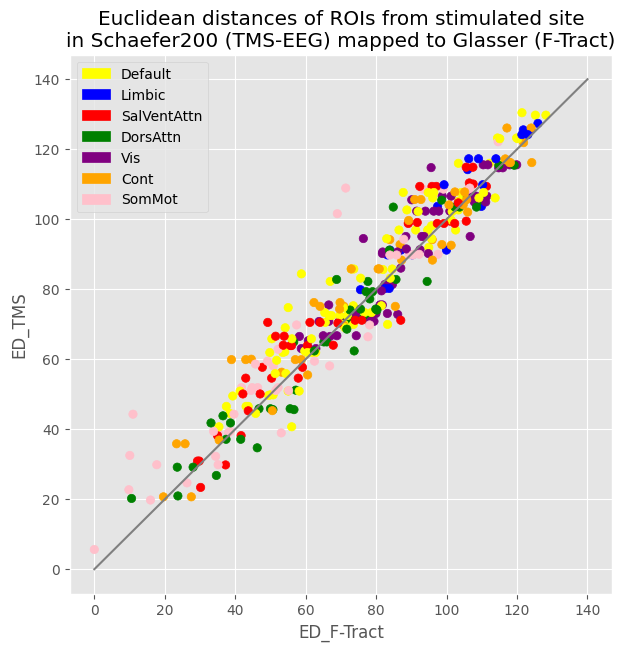

In [13]:
title = "Euclidean distances of ROIs from stimulated site\nin Schaefer200 (TMS-EEG) mapped to Glasser (F-Tract)"
plotting.scatter_two_columns_from_dataframe(merged_all,"ED","ED_TMS","regionName",corr_line = [[0,140],[0,140]],title=title,fig_dir=fig_dir)

Calculate the correlation of the vectors of euclidean distances:

In [14]:
pg.corr(merged_all["ED"],merged_all["ED_TMS"],method="spearman")

,n,r,CI95%,p-val,power
spearman,360,0.959898,"[0.95, 0.97]",8.310161e-200,1.0


Another check, plot structural connectivity lenghts. There are less point because the matrices were thresholded to keep onyl 25% strongest edges:

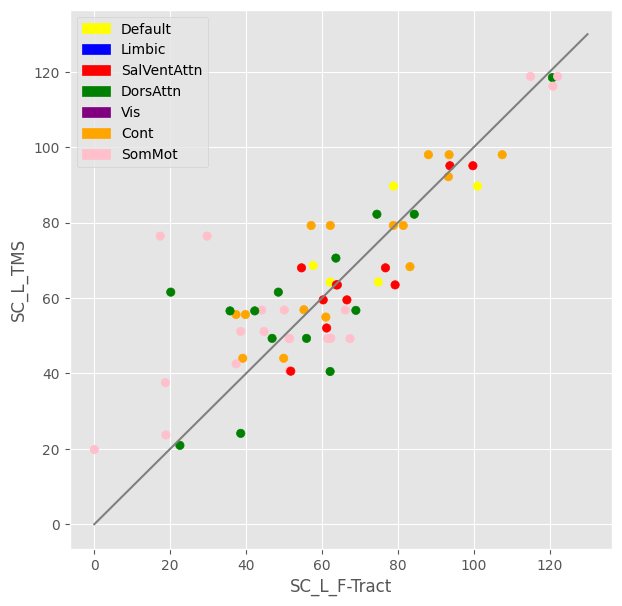

In [15]:
plotting.scatter_two_columns_from_dataframe(merged_all,"SC_L","SC_L_TMS","regionName",corr_line = [[0,130],[0,130]],fig_dir=fig_dir)

In [16]:
pg.pairwise_corr(merged_all,columns=[["SC_L"],["SC_L_TMS"]],method="spearman")

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,SC_L,SC_L_TMS,spearman,two-sided,360,0.765,"[0.72, 0.8]",2.131541e-70,1.0


Same for weights, we see that they differ more:

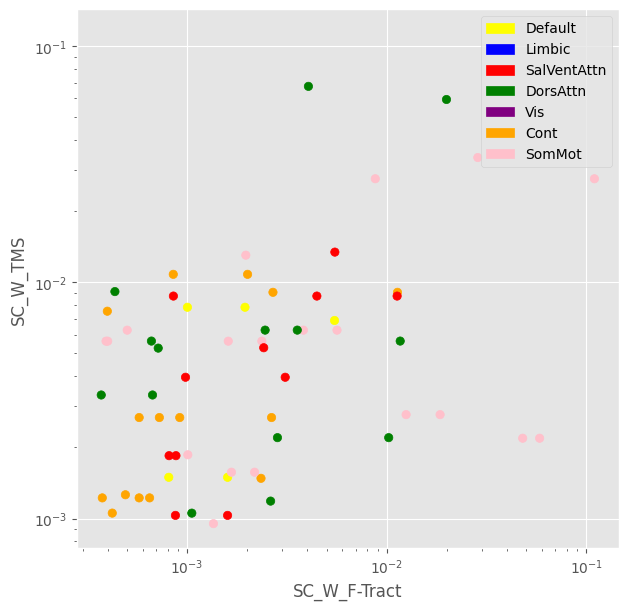

In [17]:
plotting.scatter_two_columns_from_dataframe(merged_all,"SC_W","SC_W_TMS","regionName",log_axes=True,fig_dir=fig_dir)

In [18]:
pg.corr(merged_all["SC_W"],merged_all["SC_W_TMS"],method="spearman")

,n,r,CI95%,p-val,power
spearman,360,0.729368,"[0.68, 0.77]",5.474684e-61,1.0


Finally, plot the response probability in F-Tract vs response characteristic in TMS-EEG:

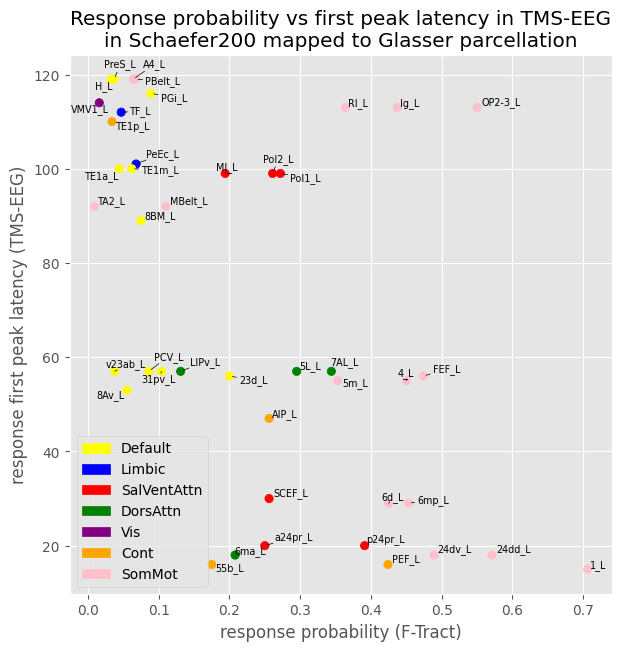

In [19]:
title = f"Response probability vs {AUC_FP} in TMS-EEG\nin Schaefer200 mapped to Glasser parcellation"
plotting.scatter_two_columns_from_dataframe(merged_all,"response","response_TMS","regionName",labels=True,title=title,labelx="response probability (F-Tract)",labely=f"response {AUC_FP} (TMS-EEG)",fig_dir=fig_dir)

And calculate the correlation:

In [20]:
pg.corr(merged_all["response"],merged_all["response_TMS"],method="spearman")

,n,r,CI95%,p-val,power
spearman,43,-0.562618,"[-0.74, -0.32]",0.000086,0.982391


### Mapping Glasser to Schaefer200

In this section, we repeat the proces with mapping Glasser ROIs (F-Tryct) to Schaefer (TMS-EEG). If a ROI is not mapped, it is discarded.

In [21]:
mapping_reverse = pd.read_csv(paths.path('interim/DICE/Schaefer200_Glasser_labelMapping_greedy.csv'),index_col=0)
mapping_reverse = mapping_reverse.reset_index(names=["schaefer"])
mapping_reverse

,schaefer,glasser
0,7Networks_LH_Vis_1,VMV1_L
1,7Networks_LH_Vis_2,V4_L
2,7Networks_LH_Vis_3,PH_L
3,7Networks_LH_Vis_4,V2_L
4,7Networks_LH_Vis_5,V1_L
...,...,...
195,7Networks_RH_Default_PFCdPFCm_6,8Av_R
196,7Networks_RH_Default_PFCdPFCm_7,8Ad_R
197,7Networks_RH_Default_pCunPCC_1,POS1_R
198,7Networks_RH_Default_pCunPCC_2,31pv_R


In [22]:
merged_ftract_dice_r = pd.merge(mapping_reverse,ftract_probabilities,left_on="glasser",right_on="label")
merged_all_reverse = pd.merge(merged_ftract_dice_r,pytepfit_response,left_on="schaefer",right_on="roi_name_csv",suffixes=["","_TMS"])
merged_all_reverse["color7"] = merged_all_reverse["schaefer"].apply(lambda x: plotting.COLOR_MAPPING_YEO[x.split("_")[2]])
merged_all_reverse[["glasser","schaefer","response","ED","response_TMS","ED_TMS","color7"]]

,glasser,schaefer,response,ED,response_TMS,ED_TMS,color7
0,VMV1_L,7Networks_LH_Vis_1,0.016,68.847152,114.0,66.719168,purple
1,V4_L,7Networks_LH_Vis_2,NaN,82.487126,111.0,81.362718,purple
2,PH_L,7Networks_LH_Vis_3,NaN,71.974313,NaN,73.076780,purple
3,V2_L,7Networks_LH_Vis_4,NaN,81.759962,30.0,77.614687,purple
4,V1_L,7Networks_LH_Vis_5,NaN,86.130607,NaN,98.514321,purple
...,...,...,...,...,...,...,...
195,8BL_R,7Networks_RH_Default_PFCdPFCm_5,NaN,83.003314,NaN,94.439638,yellow
196,8Ad_R,7Networks_RH_Default_PFCdPFCm_7,NaN,84.015017,NaN,83.158747,yellow
197,POS1_R,7Networks_RH_Default_pCunPCC_1,NaN,70.713330,119.0,74.751624,yellow
198,31pv_R,7Networks_RH_Default_pCunPCC_2,NaN,56.079353,57.0,65.834015,yellow


One more check with Euclidean distance:

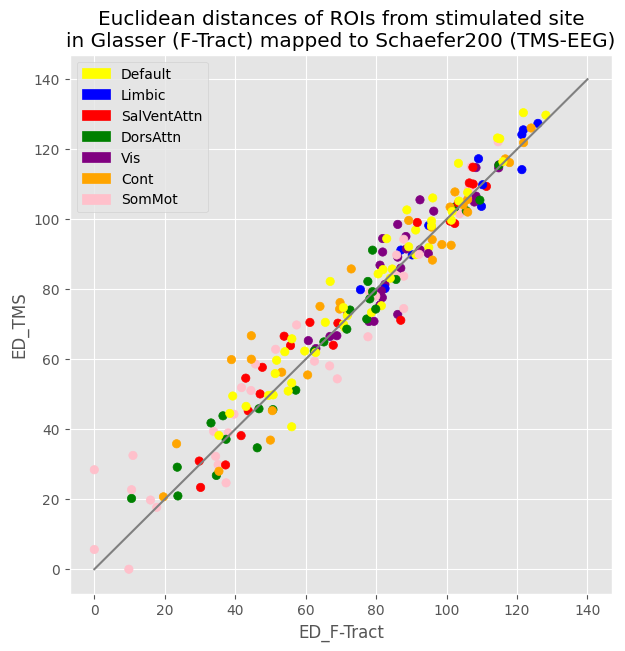

In [23]:
title = "Euclidean distances of ROIs from stimulated site\nin Glasser (F-Tract) mapped to Schaefer200 (TMS-EEG)"
plotting.scatter_two_columns_from_dataframe(merged_all_reverse,"ED","ED_TMS","glasser",corr_line = [[0,140],[0,140]],title=title,fig_dir=fig_dir)

Mapping:

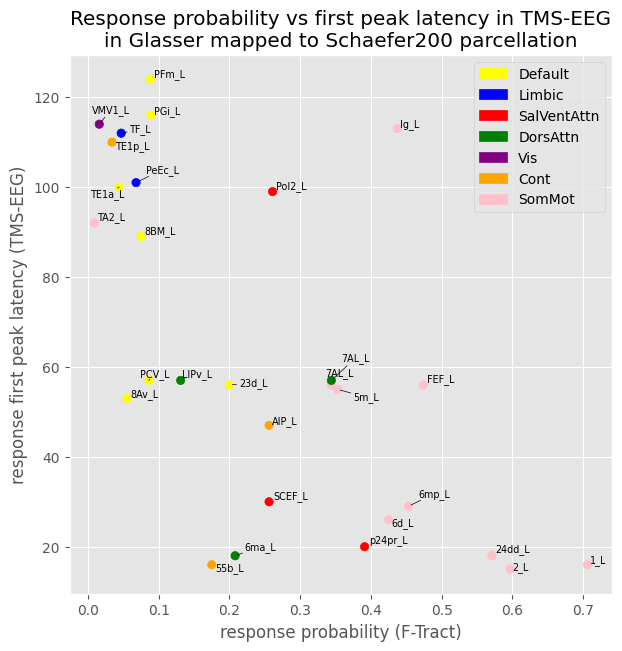

In [24]:
title = f"Response probability vs {AUC_FP} in TMS-EEG\nin Glasser mapped to Schaefer200 parcellation"
plotting.scatter_two_columns_from_dataframe(merged_all_reverse,"response","response_TMS","glasser",labels=True,title=title,labelx="response probability (F-Tract)",labely=f"response {AUC_FP} (TMS-EEG)",fig_dir=fig_dir)

In [25]:
pg.corr(merged_all_reverse["response"],merged_all_reverse["response_TMS"],method="spearman")

,n,r,CI95%,p-val,power
spearman,29,-0.633942,"[-0.81, -0.35]",0.000222,0.971751
